# Working with Data for HIV Biologists

This workshop will focus on working with tables of data (e.g. from a spreadsheet). Here we show a simplified but typical work flow - read in a Excel spreadsheet, find out more about it, answer queries about the data in the table, and make some plots to visualize the data.

The goal of the workshop is for you to learn how to run similar work flows on your own data sets.

## Import `packages` with useful functions

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read in a table from an Excel spreadsheet

In [3]:
df = pd.read_excel('data/capstone1/HIV Boot Camp.xls', 
                    sheetname='Patient Information')

## Summary of the DataFrame

In [5]:
df.shape

(3748, 10)

In [7]:
df.dtypes

ID                           int64
AGE                          int64
RACE                        object
SEX                         object
MSM                         object
IDU                         object
UNC Entry to Care Year       int64
Prior HIV Care Elsewhere    object
On ART                      object
ART Type                    object
dtype: object

In [4]:
df.head()

,ID,AGE,RACE,SEX,MSM,IDU,UNC Entry to Care Year,Prior HIV Care Elsewhere,On ART,ART Type
0,1,38,AMIND,F,No,No,2012,NO,Yes,Integrase
1,2,44,AMIND,F,No,No,2006,YES,No,NaN
2,3,33,AMIND,F,No,No,2005,NO,No,NaN
3,4,60,AMIND,F,No,Yes,2003,NO,Yes,Integrase
4,6,47,AMIND,F,No,No,2001,YES,Yes,Other


## Finding information about values in a column

In [9]:
df['RACE'].unique()

array(['AMIND', 'ASIAN', 'BLACK', 'HISPN', 'OTHER', 'UNKNW', 'WHITE'], dtype=object)

## Extracting parts of the DataFrame

In [21]:
df.ix[0]

ID                                  1
AGE                                38
RACE                            AMIND
SEX                                 F
MSM                                No
IDU                                No
UNC Entry to Care Year           2012
Prior HIV Care Elsewhere           NO
On ART                            Yes
ART Type                    Integrase
Name: 0, dtype: object

In [24]:
df.ix[df['ART Type'] == 'Integrase', :].head()

,ID,AGE,RACE,SEX,MSM,IDU,UNC Entry to Care Year,Prior HIV Care Elsewhere,On ART,ART Type
0,1,38,AMIND,F,No,No,2012,NO,Yes,Integrase
3,4,60,AMIND,F,No,Yes,2003,NO,Yes,Integrase
23,29,29,BLACK,F,No,No,2015,NO,Yes,Integrase
25,31,20,BLACK,F,No,No,2015,YES,Yes,Integrase
28,34,51,BLACK,F,No,No,2014,YES,Yes,Integrase


In [22]:
df.ix[0:2, ['ID', 'RACE', 'SEX', 'On ART']]

,ID,RACE,SEX,On ART
0,1,AMIND,F,Yes
1,2,AMIND,F,No
2,3,AMIND,F,No


## Summary of Groups

In [15]:
df.groupby('RACE')[['AGE']].agg(['median', 'mean', 'std'])

AGE                      
      median       mean        std
RACE                              
AMIND     47  48.809524   9.311556
ASIAN     39  41.125000  15.160451
BLACK     51  49.857338  12.273904
HISPN     48  48.205128   9.594899
OTHER     45  46.287736  11.245104
UNKNW     47  44.714286  10.881833
WHITE     52  51.132060  10.958169

In [18]:
df.groupby(['RACE', 'SEX'])[['ID']].count()

ID
RACE  SEX      
AMIND F      19
      M      44
ASIAN F       2
      M       6
BLACK F     770
      M    1431
HISPN F      11
      M      28
OTHER F      51
      M     161
UNKNW F       5
      M      16
WHITE F     231
      M     973

## Plots

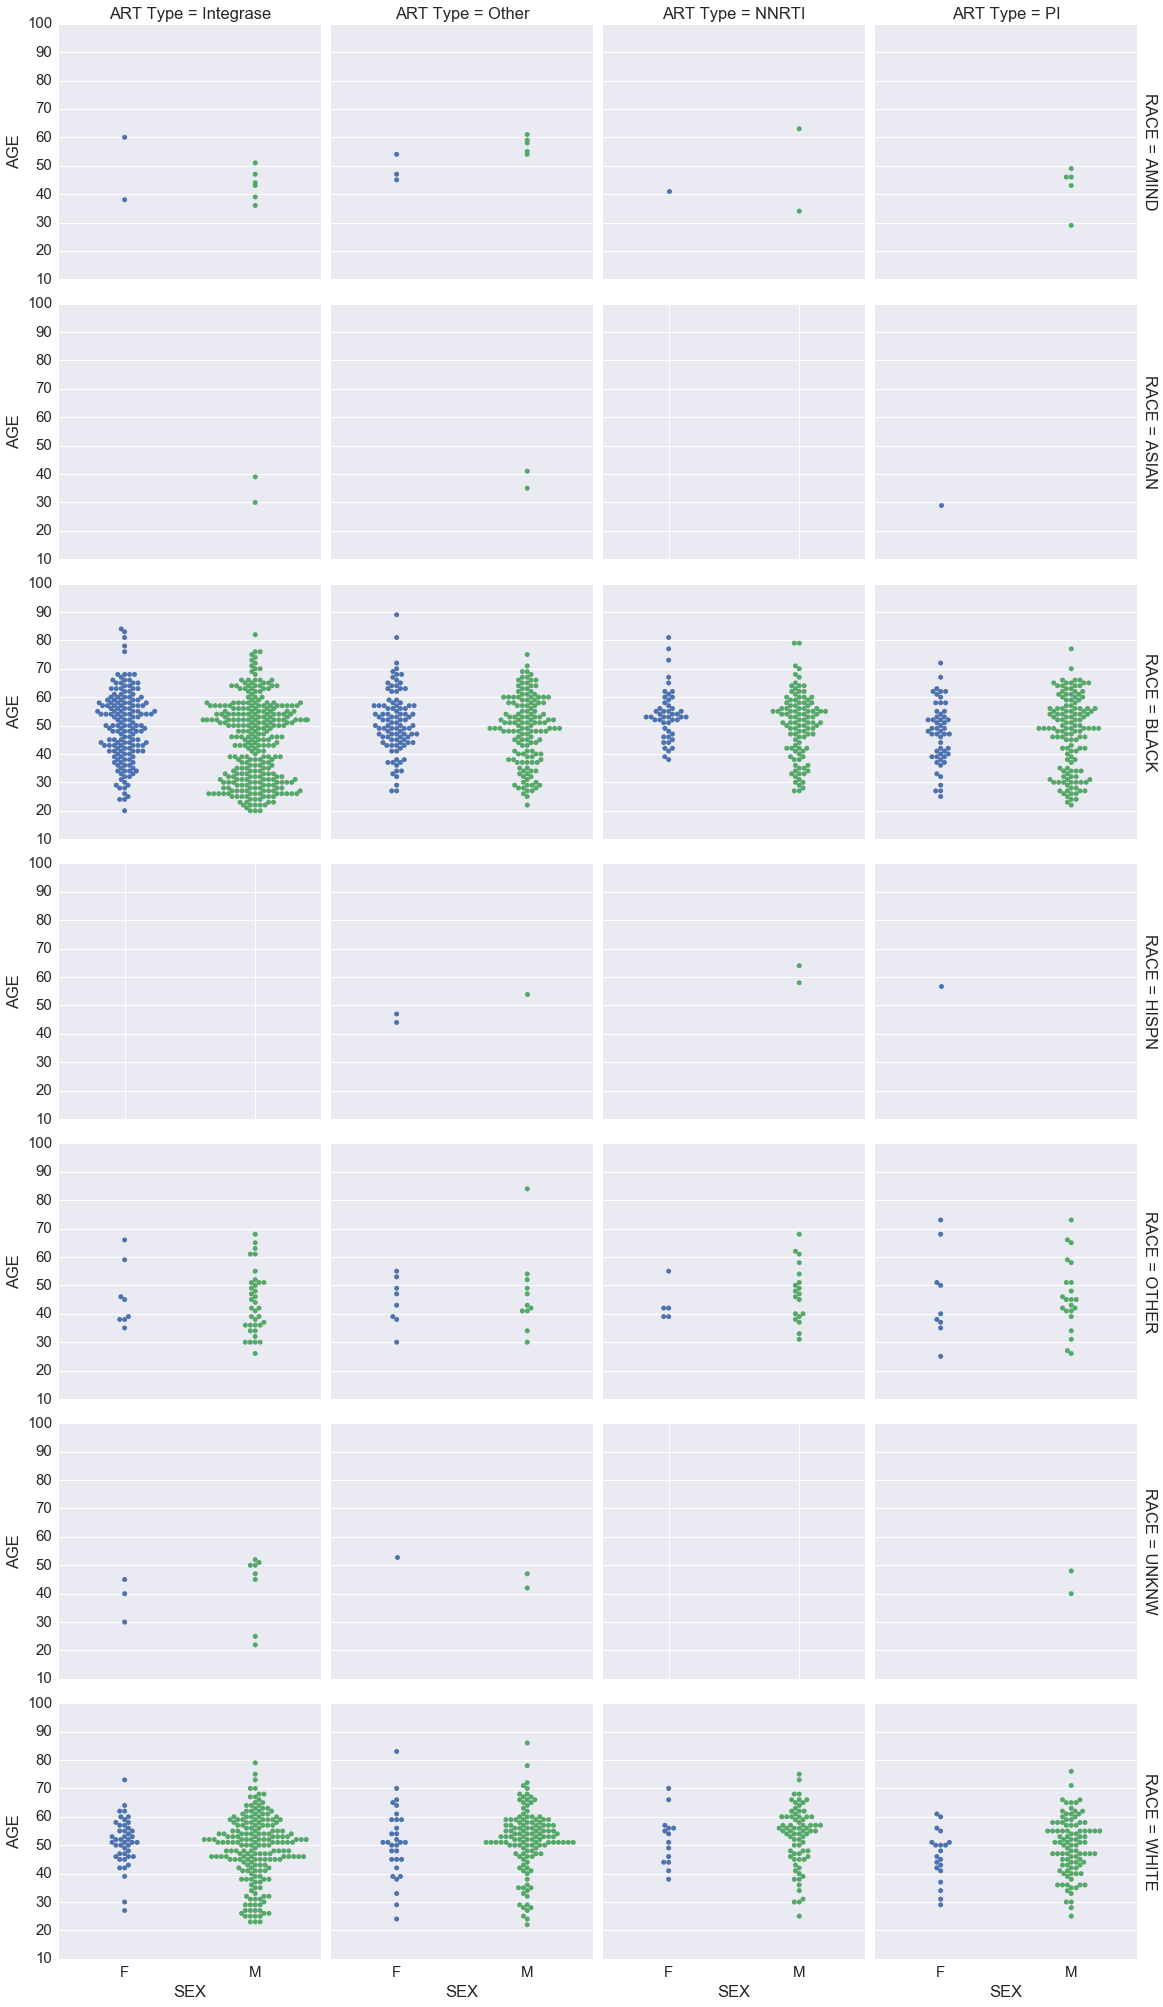

In [26]:
sns.factorplot(data=df, x='SEX', y='AGE', row='RACE', col='ART Type', kind='swarm', margin_titles=True)
pass